In [94]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
edmunds = pd.read_csv("C:\Users\Sean\Desktop\Fall 2016\Text_Analytics\Group Assignment 3\Assignment 3 Edmunds Posts.csv")
senti = pd.read_csv("C:\Users\Sean\Desktop\Fall 2016\Text_Analytics\Group Assignment 3\Assignment 3 Sentiment Scores.csv")

In [38]:
nodes = list(senti.columns.values)

In [45]:
col = senti.columns
ar = []
for i in range(len(col)-1):
    for j in range(len(col)):
        if j>i:
            pos = senti[[col[i],col[j]]][(senti[col[i]]>senti[col[j]])]
            neg = senti[[col[i],col[j]]][senti[col[i]]<senti[col[j]]]
            posv = (pos[col[i]]-pos[col[j]]).sum()
            negv = (neg[col[j]]-neg[col[i]]).sum()
            sen = posv-negv
            ar.append((col[i],col[j],sen))

In [46]:
ar2=[]
for i in ar:
    if i[2]<0:
        ar2.append((i[1],i[0],-i[2]))
    else:
        ar2.append(i)
    

In [47]:
DG=nx.DiGraph()
DG.add_nodes_from(nodes)
DG.add_weighted_edges_from(ar2)

In [65]:
t = []
for i in range(len(col)):
    t.append(i*1000)

In [71]:
pr = nx.pagerank(DG, alpha=0.9)

In [85]:
pr

{'3series': 0.09075063199737358,
 '5series': 0.07747619904919195,
 '7series': 0.160637672216164,
 'A6': 0.20423676408794073,
 'A8': 0.18100343990158038,
 'ES': 0.014493643595622937,
 'LS': 0.043016219287835916,
 'RX': 0.013939189488911659,
 'Sclass': 0.15486717266353944,
 'XJ': 0.059579067711839545}

In [147]:
page_rank_arr = []
page_rank_arr2 = []
for i in col:
    page_rank_arr.append((i,pr[i]*25000))
    page_rank_arr2.append(pr[i]*25000)

In [112]:
DG=nx.DiGraph()
DG.add_nodes_from(nodes,node_size=page_rank_arr)
DG.add_weighted_edges_from(ar2)

In [130]:
col2 = []
for i in col:
    col2.append(i)

In [152]:
col

Index([u'ES', u'LS', u'RX', u'A8', u'A6', u'3series', u'5series', u'7series',
       u'XJ', u'Sclass'],
      dtype='object')

In [ ]:
Audi A6
Audi A8
BMW 3-series
BMW 5-series
BMW 7-series
Jaguar XJ
Lexus ES
Lexus LS
Lexus RX
Mercedes S-class


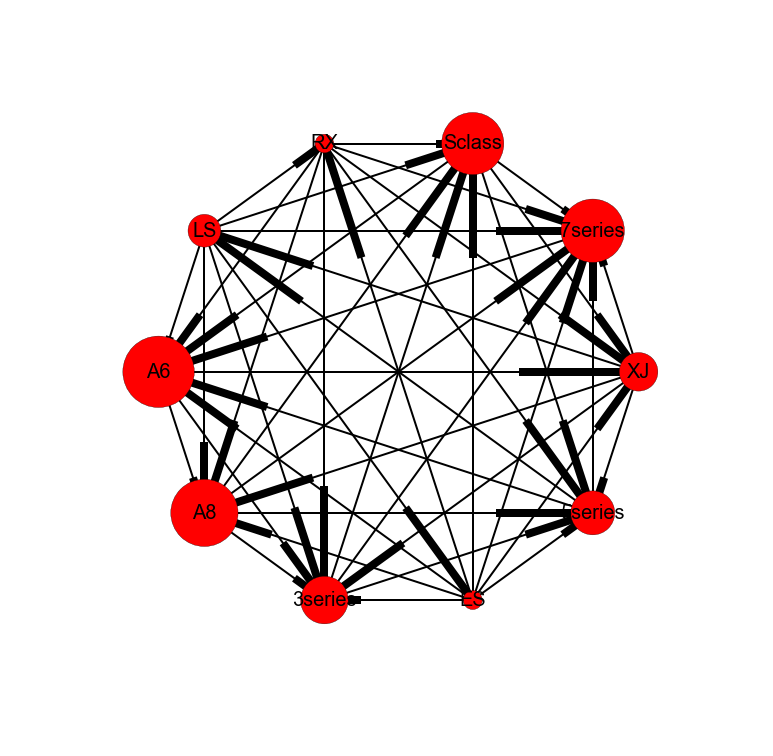

In [158]:
plt.figure(figsize=(10,10))
nx.draw_circular(DG,nodelist=col2, font_size=20, width=2,
               node_size=page_rank_arr2,with_labels=True)